# Analysing Trajectories with Gradient Panoramas

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

from unityvr.preproc import logproc
from unityvr.viz import viz

from os.path import sep, exists, isfile, join
from os import makedirs, listdir

## Specify Filepath

In [89]:
rootDir = '/Volumes/jayaramanlab/Shivam/unityLogs'
subDir = 'landmarks/WTB/female/f02/lmkF1'
dataDir = sep.join([rootDir+'/raw',subDir])
preprocDir = rootDir + "/preproc/" + subDir

In [90]:
fileNames = [f for f in listdir(preprocDir) if not '.DS_Store' in f]
fileNames

['trial01']

In [91]:
preprocDir

'/Volumes/jayaramanlab/Shivam/unityLogs/preproc/landmarks/WTB/female/f02/lmkF1'

## Choose Trial

In [92]:
trialname = 'trial01'
trialDir = sep.join([preprocDir,trialname])

In [93]:
uvrDat = logproc.loadUVRData(trialDir)
uvrDat.printMetadata()

Metadata:

expid  :  WTB_lmkF1
experiment  :  projectors on, 120 Hz frame rate
genotype  :  WTB
sex  :  f
flyid  :  f02
trial  :  trial01
date  :  2021-08-18
time  :  21-12-10
ballRad  :  0.04399999976158142
setFrameRate  :  120
notes  :  behavior only


## Generate Plot Directory

In [86]:
plotDir = sep.join([rootDir+'/plot',subDir,trialname])

# Generate directory where plots are to be saved
saveDir = sep.join([plotDir]) #condition
if not exists(saveDir):
    makedirs(saveDir)
print(saveDir)

/Volumes/jayaramanlab/Shivam/unityLogs/plot/landmarks/WTB/male/f01/lmkF1/trial01


In [87]:
#conversion factor to cm including radial error
dc2cm = 10*0.044/uvrDat.metadata['ballRad']

posDf = uvrDat.posDf

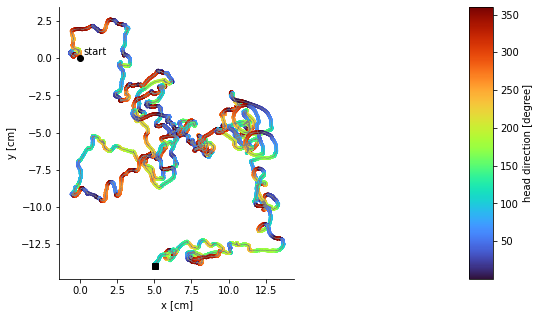

In [88]:
fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios':[20,1]})
axs[0].plot(posDf.x*dc2cm,posDf.y*dc2cm,color='grey', linewidth=0.5)
cb = axs[0].scatter(posDf.x*dc2cm,posDf.y*dc2cm,s=5,c=posDf.angle, cmap='turbo')
axs[0].plot(posDf.x[0]*dc2cm,posDf.y[0]*dc2cm,'ok')
axs[0].text(posDf.x[0]*dc2cm+0.2,posDf.y[0]*dc2cm+0.2,'start')
axs[0].plot(posDf.x.values[-1]*dc2cm,posDf.y.values[-2]*dc2cm,'sk')
axs[0].set_aspect('equal')
axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
viz.myAxisTheme(axs[0])
plt.colorbar(cb,cax=axs[1], label='head direction [degree]');
fig.savefig(saveDir+sep+'_'.join(['walking_trajectory', uvrDat.metadata['genotype'], 
                                  uvrDat.metadata['sex'],
                                  uvrDat.metadata['flyid'],
                                  uvrDat.metadata['expid'][-5:],
                                  uvrDat.metadata['trial']+'.pdf']))

## Group Analysis

In [793]:
rootDir = '/Volumes/jayaramanlab/Shivam/unityLogs'
subDir = 'panoramaSunspot/WTB/female'
dataDir = sep.join([rootDir+'/raw',subDir])
preprocDir = rootDir + "/preproc/" + subDir
plotDir = sep.join([rootDir+'/plot',subDir])
print(plotDir)

/Volumes/jayaramanlab/Shivam/unityLogs/plot/panoramaSunspot/WTB/female


In [794]:
group = 'panA2'

In [795]:
exclude = ['f05']

In [796]:
flies = [f for f in listdir(preprocDir) if (f!='.DS_Store')]
trajDirs = sorted([sep.join([preprocDir,f,group]) for f in flies if 
            (f not in exclude) & (group in listdir(sep.join([preprocDir,f])))])

In [797]:
trajDirs

['/Volumes/jayaramanlab/Shivam/unityLogs/preproc/panoramaSunspot/WTB/female/f01/panA2',
 '/Volumes/jayaramanlab/Shivam/unityLogs/preproc/panoramaSunspot/WTB/female/f02/panA2',
 '/Volumes/jayaramanlab/Shivam/unityLogs/preproc/panoramaSunspot/WTB/female/f03/panA2',
 '/Volumes/jayaramanlab/Shivam/unityLogs/preproc/panoramaSunspot/WTB/female/f04/panA2',
 '/Volumes/jayaramanlab/Shivam/unityLogs/preproc/panoramaSunspot/WTB/female/f06/panA2',
 '/Volumes/jayaramanlab/Shivam/unityLogs/preproc/panoramaSunspot/WTB/female/f07/panA2',
 '/Volumes/jayaramanlab/Shivam/unityLogs/preproc/panoramaSunspot/WTB/female/f08/panA2']

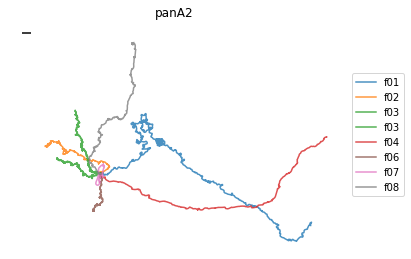

In [798]:
fig, axs = plt.subplots(figsize=(6,6))
cm = plt.cm.tab10(range(pd.Series(trajDirs).str[-8:-6].astype('int').max()))

for traj in trajDirs:
    trials = [f for f in listdir(traj) if not '.DS_Store' in f]
    for trl in trials:
        mydir = sep.join([traj,trl])
        uvr = logproc.loadUVRData(mydir)
        dc2cm = 10*0.044/uvr.metadata['ballRad']
        plt.plot(uvr.posDf['x']*dc2cm,uvr.posDf['y']*dc2cm,c=cm[int(traj[-8:-6])-1],
                 label=traj[-9:-6],alpha=0.8)
        plt.axis('off')
        plt.title(group)

axs.set_aspect('equal')
axs.hlines(y=axs.get_ylim()[1], xmin=axs.get_xlim()[0]-10, 
           xmax=axs.get_xlim()[0], colors='k', lw=1.5)
plt.legend(bbox_to_anchor=(1.2, 0.8))
plt.gca().get_ylim()
plt.savefig(plotDir+sep+'_'.join(['walking_trajectories', uvr.metadata['genotype'], 
                                  uvr.metadata['sex'],group+'.pdf']),bbox_inches='tight')